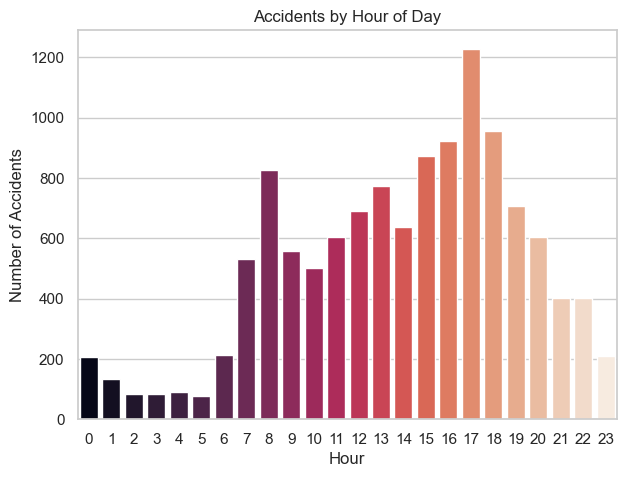

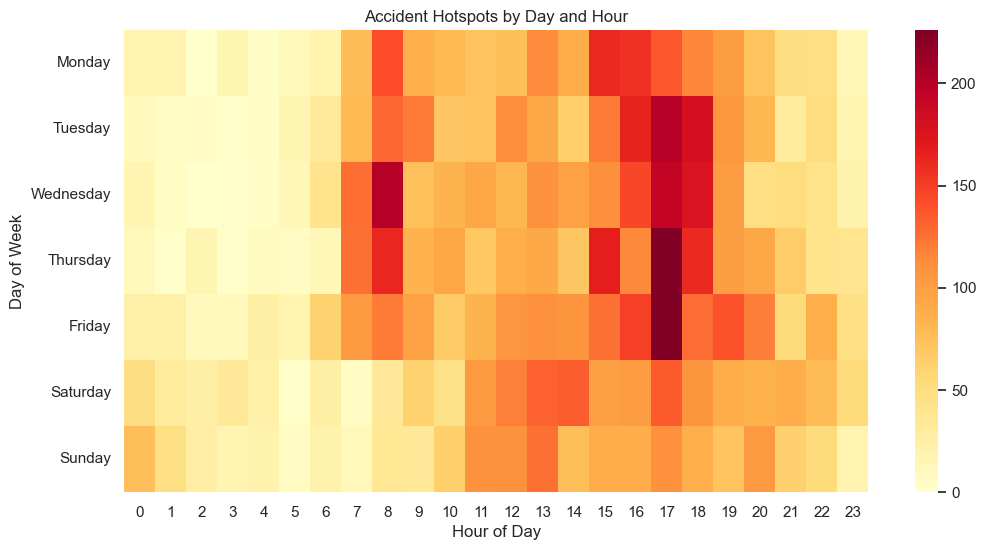

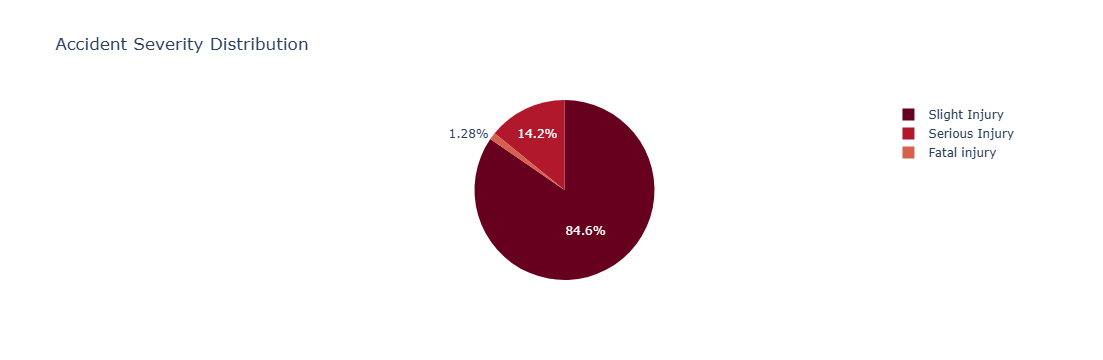

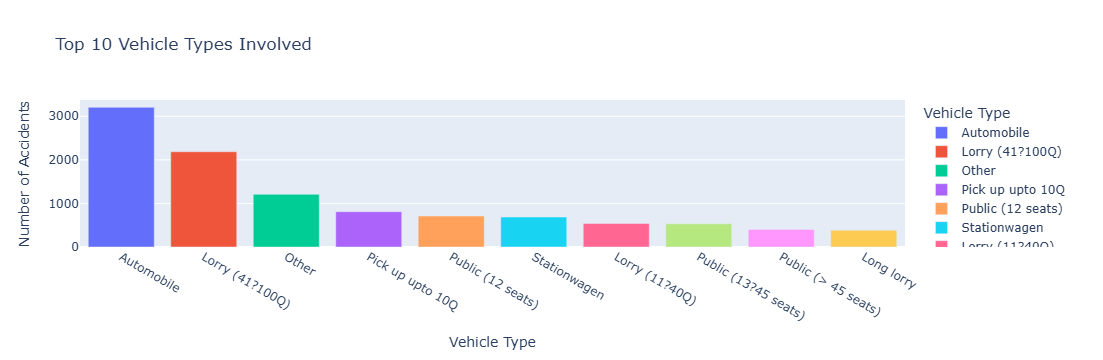

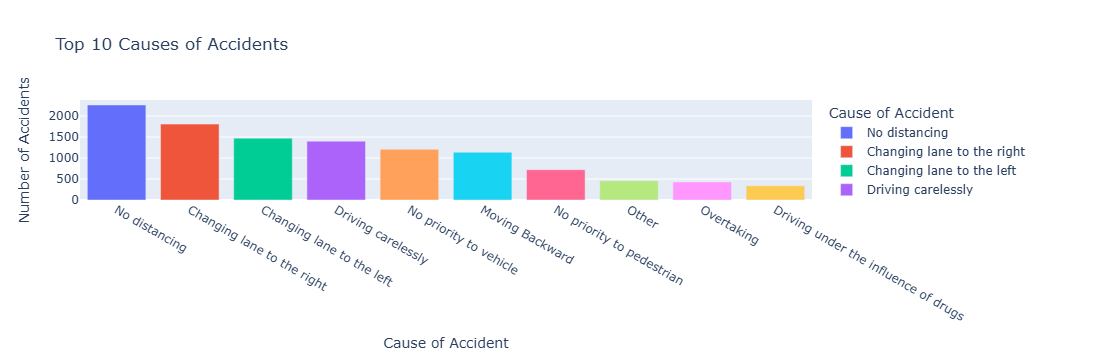

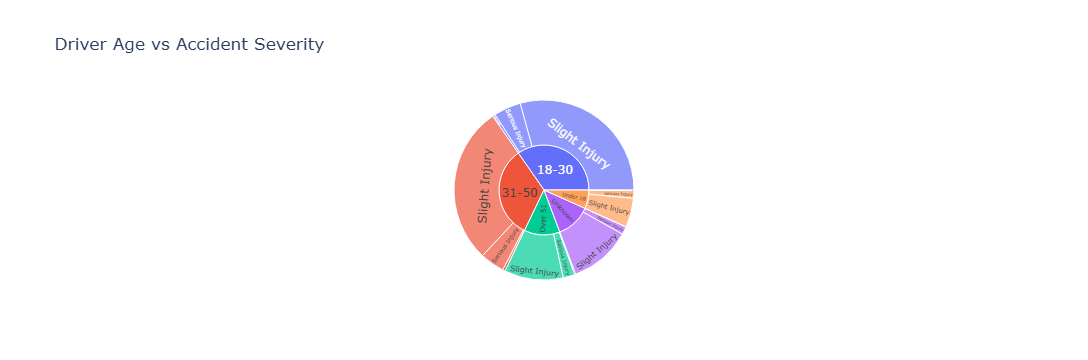

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="whitegrid")

df = pd.read_csv(r'C:\Users\asus\Desktop\prodigy\RTA Dataset.csv')

df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.hour

accidents_by_hour = df['Time'].value_counts().sort_index().reset_index()
accidents_by_hour.columns = ['Hour', 'Accident_Count']

accidents_by_day = df['Day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()
accidents_by_day.columns = ['Day', 'Accident_Count']

accidents_by_weather = df['Weather_conditions'].value_counts().reset_index()
accidents_by_weather.columns = ['Weather', 'Accident_Count']

accidents_by_road = df['Road_surface_conditions'].value_counts().reset_index()
accidents_by_road.columns = ['Road_Condition', 'Accident_Count']

plt.figure(figsize=(12, 9))

plt.subplot(2, 2, 1)
sns.barplot(data=accidents_by_hour, x='Hour', y='Accident_Count', hue='Hour', palette='rocket', legend=False)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

heatmap_data = df.groupby(['Day_of_week', 'Time']).size().unstack(fill_value=0)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(ordered_days)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd')
plt.title('Accident Hotspots by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

top_vehicles = df['Type_of_vehicle'].value_counts().nlargest(10).reset_index()
top_vehicles.columns = ['Vehicle_Type', 'Count']

top_causes = df['Cause_of_accident'].value_counts().nlargest(10).reset_index()
top_causes.columns = ['Cause', 'Count']

fig1 = px.pie(df, names='Accident_severity', title='Accident Severity Distribution',
              color_discrete_sequence=px.colors.sequential.RdBu)

fig2 = px.bar(top_vehicles, x='Vehicle_Type', y='Count',
              title='Top 10 Vehicle Types Involved',
              labels={'Vehicle_Type': 'Vehicle Type', 'Count': 'Number of Accidents'},
              color='Vehicle_Type')

fig3 = px.bar(top_causes, x='Cause', y='Count',
              title='Top 10 Causes of Accidents',
              labels={'Cause': 'Cause of Accident', 'Count': 'Number of Accidents'},
              color='Cause')

fig4 = px.sunburst(df, path=['Age_band_of_driver', 'Accident_severity'],
                   title='Driver Age vs Accident Severity')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
